In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from  torch.utils.data import DataLoader , TensorDataset
import matplotlib.pyplot as plt

In [3]:
# Generating a random dataset
X_train = torch.randn(1000,20)
y_train = torch.randint(0, 2, (1000, 1)).float()


In [4]:
class SimpleNN(nn.Module):
  def __init__(self):
    super(SimpleNN, self).__init__()
    self.fc1 = nn.Linear(20,64)
    self.fc2 = nn.Linear(64,1)

  def forward(self,x):
    x = torch.relu(self.fc1(x))
    x = torch.sigmoid(self.fc2(x))
    return x

In [5]:
model = SimpleNN()

In [6]:
#loss function and optii,izer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

In [7]:
#Creating Dataloader
dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(dataset, batch_size=32, shuffle=True)

In [9]:
#training loop  with mini-batch loss tracking
batch_losses= []
epochs = 10

for epoch in range(epochs):
  for batch_X, batch_y in train_loader:
    #forward pass
    outputs = model(batch_X)
    loss = criterion(outputs, batch_y)

    # baclward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # record mini- batch loss
    batch_losses.append(loss.item())

  print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item(): .4f}")



Epoch [1/10], Loss:  0.6768
Epoch [2/10], Loss:  0.7094
Epoch [3/10], Loss:  0.7544
Epoch [4/10], Loss:  0.6996
Epoch [5/10], Loss:  0.6919
Epoch [6/10], Loss:  0.7180
Epoch [7/10], Loss:  0.7019
Epoch [8/10], Loss:  0.6597
Epoch [9/10], Loss:  0.6980
Epoch [10/10], Loss:  0.6845


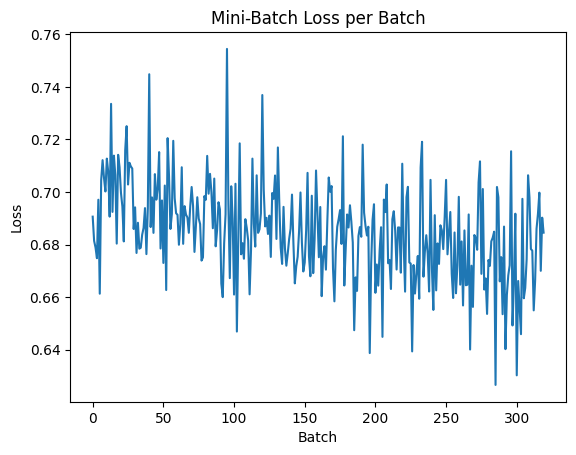

In [11]:
#plotting the mini batch losses
plt.plot(batch_losses)
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.title('Mini-Batch Loss per Batch')
plt.show()